## DİAMOND DATASET

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('diamonds')

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


DOMAİN KNOWLEDGE

# 1. Hedef Değişken (Tahmin Edeceğimiz)

price (Fiyat): Elmasın ABD Doları cinsinden fiyatı.

# 2. Fiziksel Özellikler (Sayısal)
carat (Karat): Elmasın ağırlığıdır. (Boyut değil, ağırlık birimidir).

Not: 1 Karat = 0.2 gramdır. Genelde fiyatı en çok artıran özellik budur.

x: Uzunluk (mm).

y: Genişlik (mm).

z: Derinlik (mm).

# 3. Kalite Özellikleri (Kategorik - Yazı)

Bunlar model için çok kritiktir çünkü "aynı ağırlıktaki" iki elmasın fiyat farkını bunlar belirler.

CUT (Kesim Kalitesi): Elmasın parıldaması için ne kadar iyi kesildiği. (Şekli değil, işçiliği).

Sıralama (Kötüden İyiye): Fair $\rightarrow$ Good $\rightarrow$ Very Good $\rightarrow$ Premium $\rightarrow$ Ideal.

COLOR (Renk): Elmasın ne kadar "renksiz" olduğu.

Sıralama (Kötüden İyiye): J (Hafif Sarı) $\rightarrow$ ... $\rightarrow$ D (Tamamen Renksiz/En Değerli).İpucu: D harfi "Diamond"dan gelir, en iyisidir.

CLARITY (Berraklık): Elmasın içinde leke veya çizik olup olmadığı.

Sıralama (Kötüden İyiye): I1 (Lekeli) $\rightarrow$ SI2 $\rightarrow$ SI1 $\rightarrow$ VS2 $\rightarrow$ VS1 $\rightarrow$ VVS2 $\rightarrow$ VVS1 $\rightarrow$ IF (Internally Flawless - Kusursuz).




# 4. Teknik Oranlar (Biraz Karışık Olanlar)

Buradaki depth ve table sütunlarını anlamak için elmasın anatomisine bakmak gerekir.


DEPTH (Derinlik Yüzdesi): Elmasın ne kadar derin olduğu. Işığı yansıtması için çok önemli.


Formülü: $\frac{z}{\text{ortalama}(x, y)} \times 100$

İdeal: Genelde 58-62 arası değerler ışığı en iyi yansıtır.

TABLE (Tabla Genişliği): Elmasın en tepesindeki düz yüzeyin genişliği. Elmasın ne kadar geniş göründüğünü belirler.

In [ ]:
print("--- KESİM (Cut) Türleri ---")
print(df['cut'].unique())

print("\n--- RENK (Color) Kodları ---")
print(df['color'].unique())

print("\n--- BERRAKLIK (Clarity) Kodları ---")
print(df['clarity'].unique())

--- KESİM (Cut) Türleri ---
['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

--- RENK (Color) Kodları ---
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

--- BERRAKLIK (Clarity) Kodları ---
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


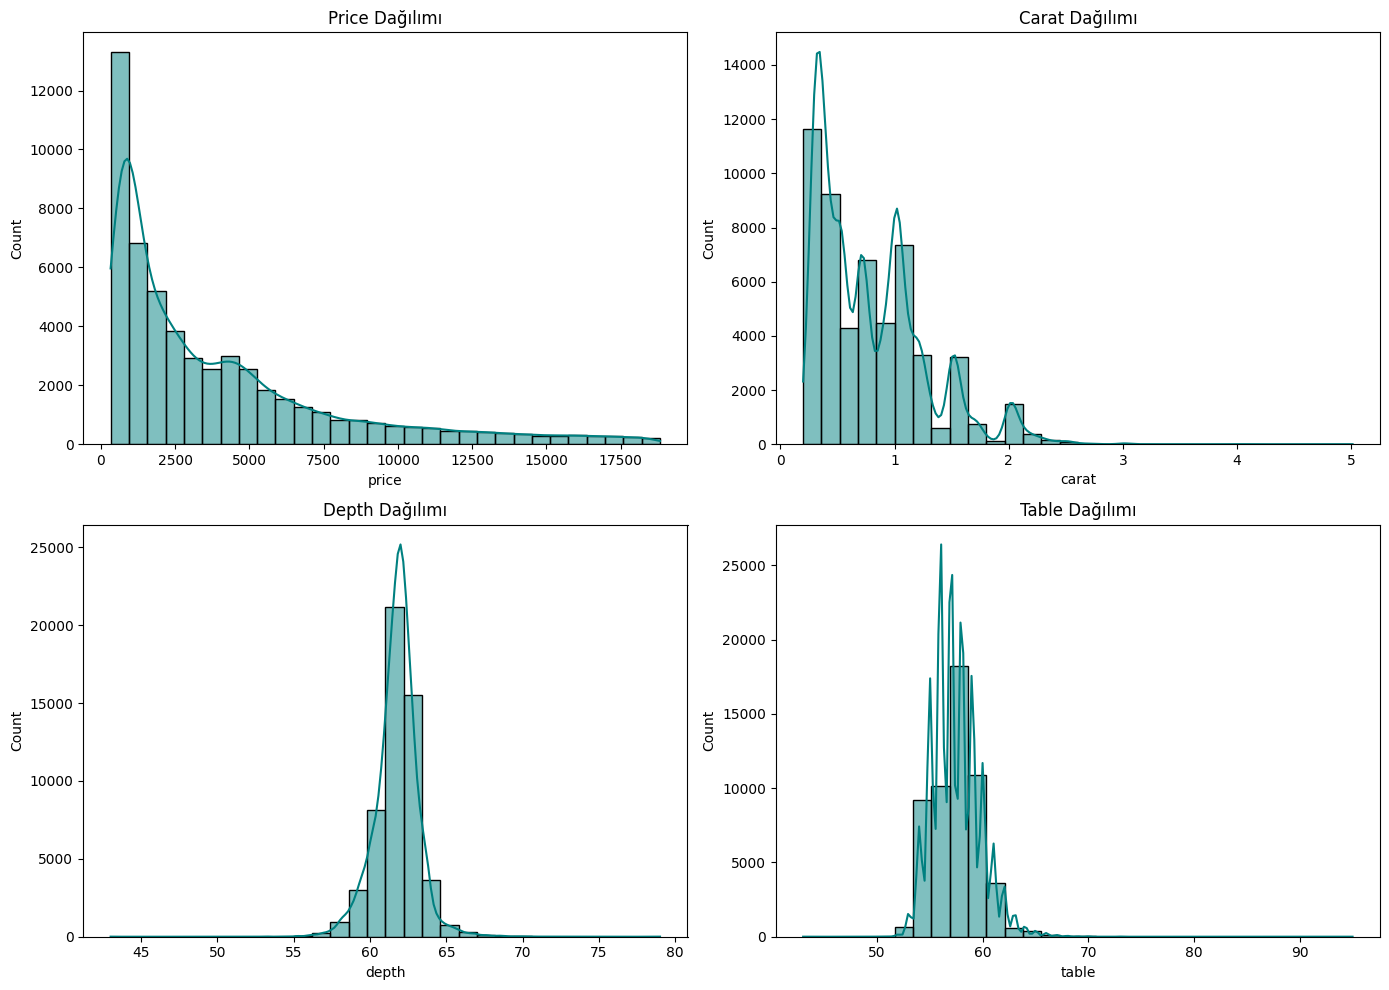

In [ ]:
# Sayısal sütunlar
cols = ['price', 'carat', 'depth', 'table']

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, bins=30, color='teal', ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'{col.capitalize()} Dağılımı')

plt.tight_layout()
plt.show()

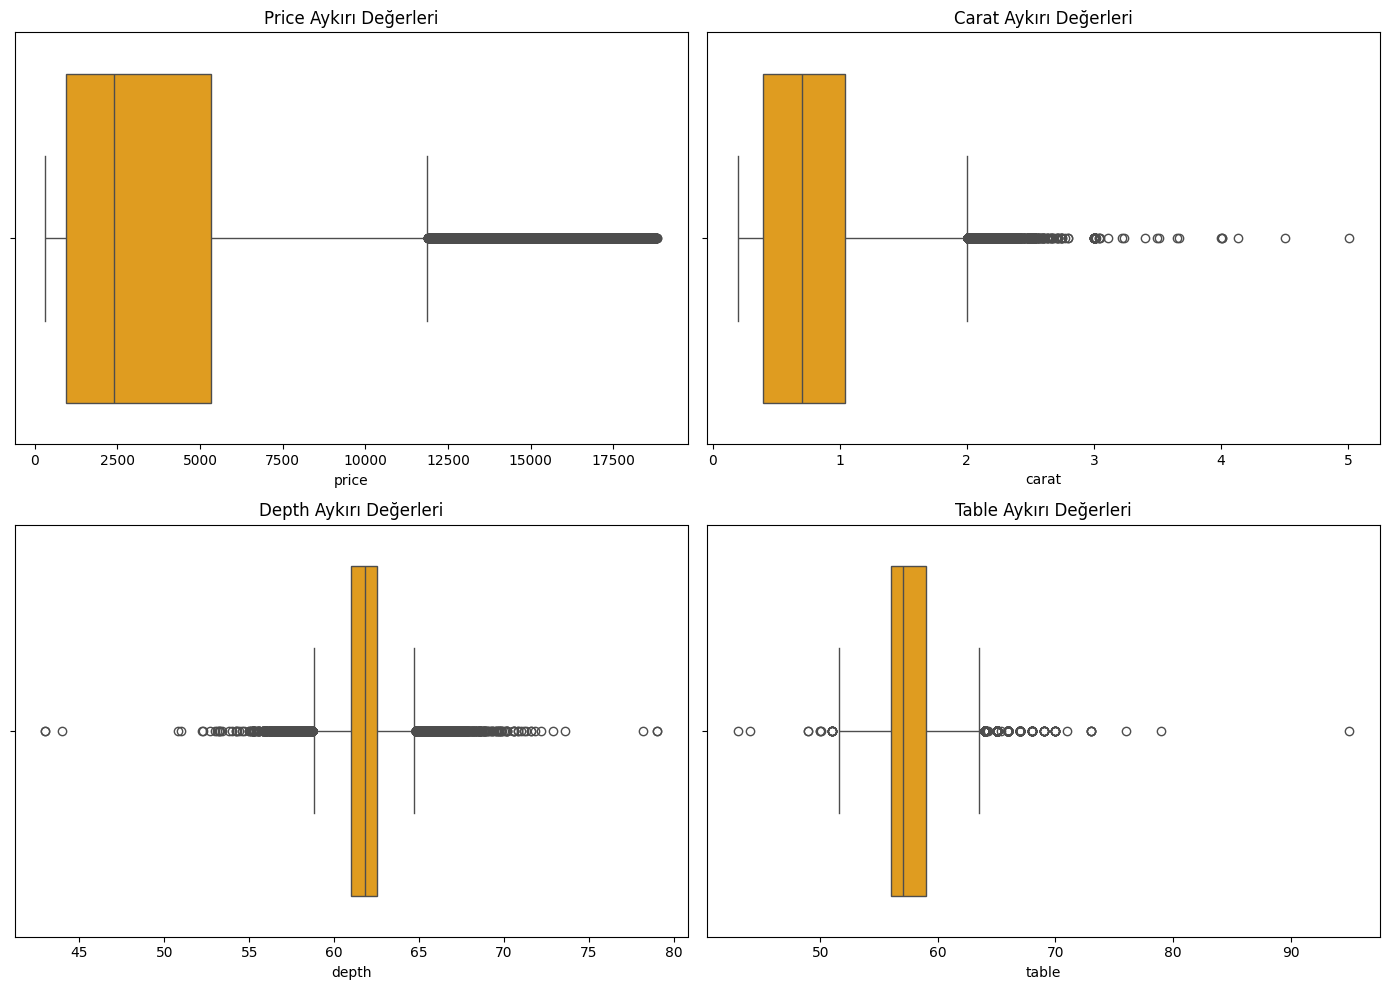

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, color='orange', ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'{col.capitalize()} Aykırı Değerleri')

plt.tight_layout()
plt.show()

In [ ]:
print("X (Boy) değeri 0 olanlar:", len(df[df['x'] == 0]))
print("Y (En) değeri 0 olanlar:", len(df[df['y'] == 0]))
print("Z (Derinlik) değeri 0 olanlar:", len(df[df['z'] == 0]))

X (Boy) değeri 0 olanlar: 8
Y (En) değeri 0 olanlar: 7
Z (Derinlik) değeri 0 olanlar: 20


In [ ]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

Price ve Carat kısmındaki o siyah noktalar. (Outliers).

18.000 dolarlık elmas hatalı değildir, sadece nadirdir. Eğer onları silersek, modelimiz "Pahalı elmasları" asla öğrenemez.

Bazı aykırı değerler bariz hatadır. Örneğin: Çok küçük karatlı ama devasa boyutlu (x, y, z) bir elmas varsa, bu bir hatadır.

Bunu görmek için Scatter Plot (Saçılım Grafiği) çizelim. Karat ile Boyutlar arasındaki ilişkiye bakalım.

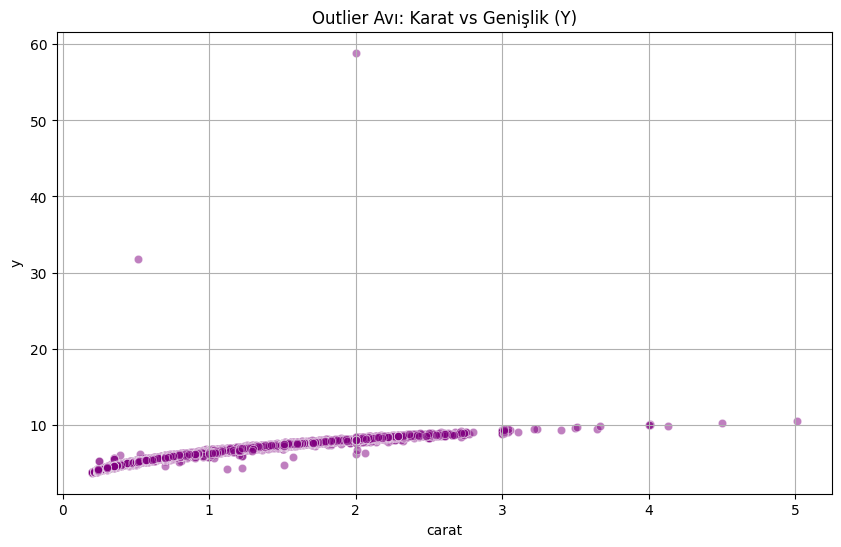

In [ ]:
plt.figure(figsize=(10, 6))

# Karat (Ağırlık) vs Y (Genişlik)
# Normalde ağırlık arttıkça genişlik de artmalı.
sns.scatterplot(data=df, x='carat', y='y', color='purple', alpha=0.5)

plt.title('Outlier Avı: Karat vs Genişlik (Y)')
plt.grid(True)
plt.show()

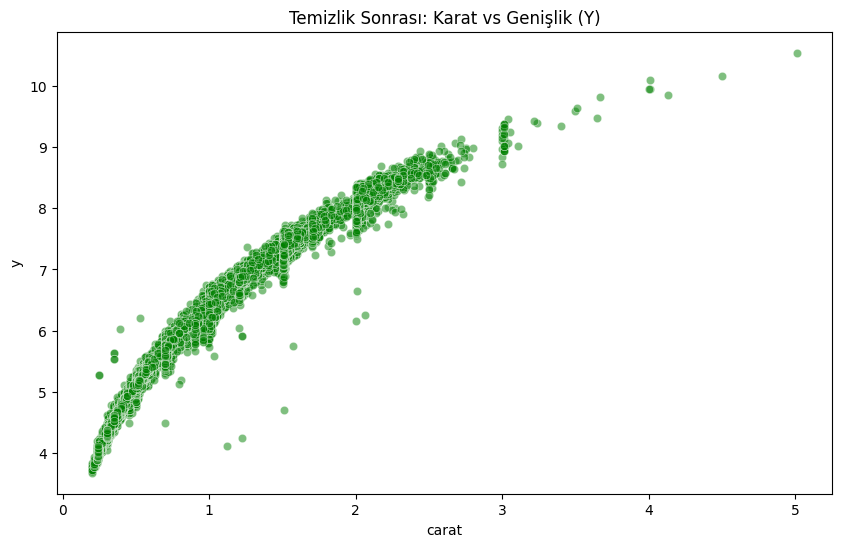

In [ ]:
df = df[(df['y'] < 20) & (df['z'] < 20)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='y', color='green', alpha=0.5)
plt.title('Temizlik Sonrası: Karat vs Genişlik (Y)')
plt.show()

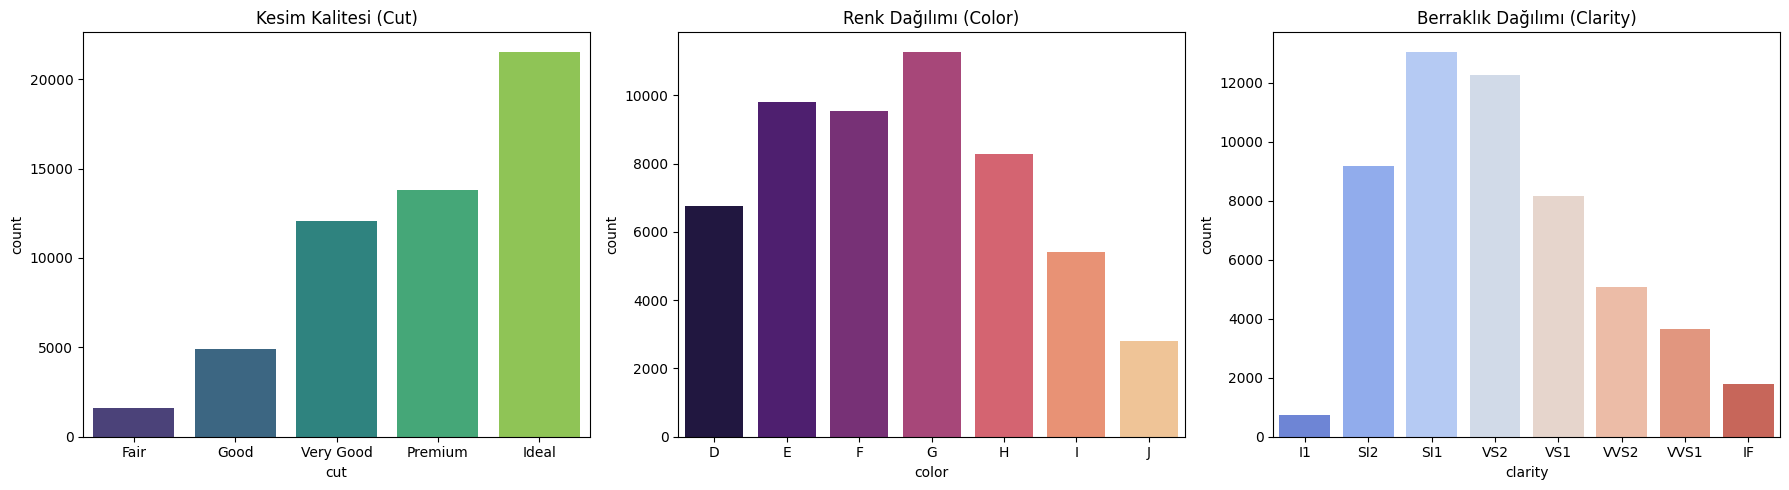

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1. Kesim Kalitesi (Sıralı: Kötüden İyiye)
order_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sns.countplot(data=df, x='cut', ax=ax[0], order=order_cut, palette='viridis')
ax[0].set_title('Kesim Kalitesi (Cut)')

# 2. Renk (Sıralı: En İyi D -> En Kötü J)
order_color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
sns.countplot(data=df, x='color', ax=ax[1], order=order_color, palette='magma')
ax[1].set_title('Renk Dağılımı (Color)')

# 3. Berraklık (Sıralı: Kötüden İyiye)
order_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.countplot(data=df, x='clarity', ax=ax[2], order=order_clarity, palette='coolwarm')
ax[2].set_title('Berraklık Dağılımı (Clarity)')

plt.tight_layout()
plt.show()

In [ ]:
# 1. Kopyasını alalım (Orjinal veri bozulmasın)
df_encoded = df.copy()

# 2. Rütbeleri (Mapping) Tanımlayalım
# Kesim Sıralaması (Kötüden İyiye)
cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

# Renk Sıralaması (J en sarı/kötü, D en beyaz/iyi)
color_map = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

# Berraklık Sıralaması (Lekeliden Temize)
clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

# 3. Dönüştürme İşlemi (Mapping Uygula)
df_encoded['cut_score'] = df_encoded['cut'].map(cut_map)
df_encoded['color_score'] = df_encoded['color'].map(color_map)
df_encoded['clarity_score'] = df_encoded['clarity'].map(clarity_map)

# Eski yazı sütunlarını atalım, artık puanları var
df_encoded = df_encoded.drop(['cut', 'color', 'clarity'], axis=1)

print("Dönüşüm Tamamlandı! Artık her şey sayısal:")
print(df_encoded.head())

Dönüşüm Tamamlandı! Artık her şey sayısal:
   carat  depth  table  price     x     y     z cut_score color_score  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         5           6   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         4           6   
2   0.23   56.9   65.0    327  4.05  4.07  2.31         2           6   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         4           2   
4   0.31   63.3   58.0    335  4.34  4.35  2.75         2           1   

  clarity_score  
0             2  
1             3  
2             5  
3             4  
4             2  


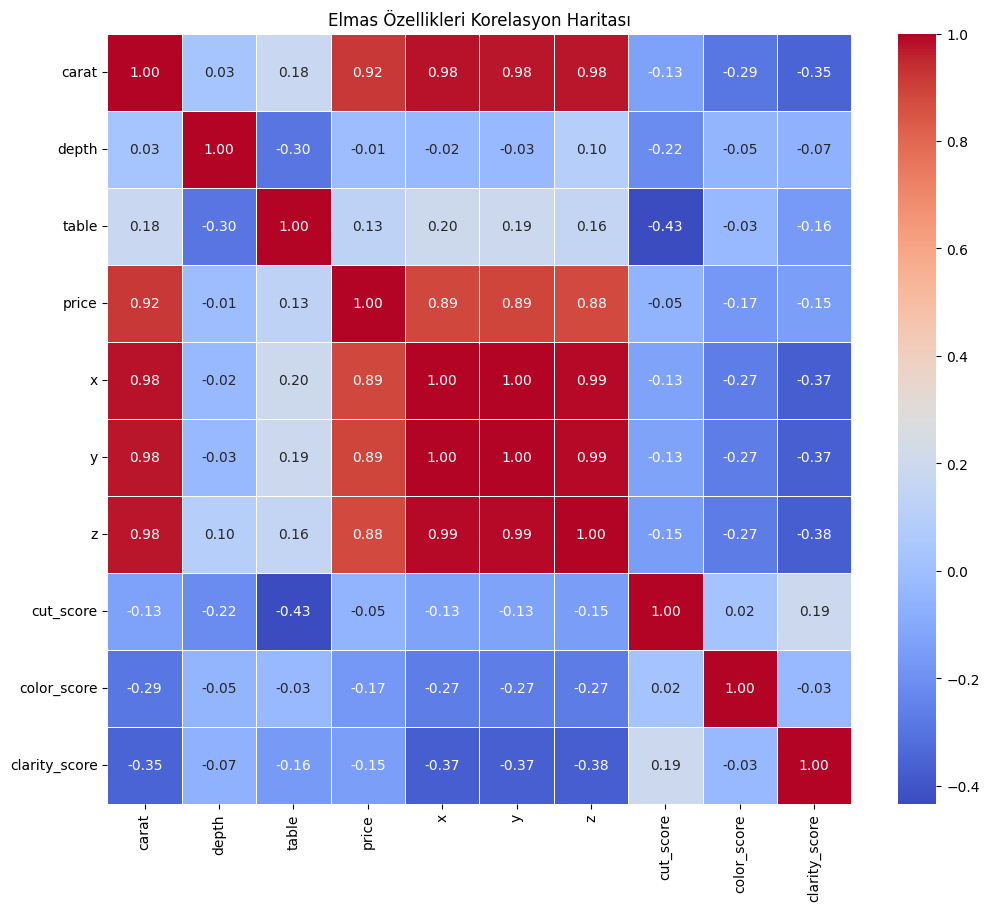

In [ ]:
# 3. HEATMAP ÇİZİMİ
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Elmas Özellikleri Korelasyon Haritası')
plt.show()

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53917 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   carat          53917 non-null  float64 
 1   depth          53917 non-null  float64 
 2   table          53917 non-null  float64 
 3   price          53917 non-null  int64   
 4   x              53917 non-null  float64 
 5   y              53917 non-null  float64 
 6   z              53917 non-null  float64 
 7   cut_score      53917 non-null  category
 8   color_score    53917 non-null  category
 9   clarity_score  53917 non-null  category
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


<Axes: xlabel='carat', ylabel='price'>

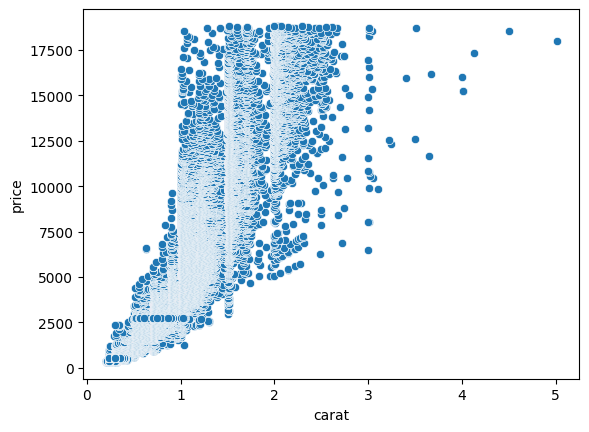

In [25]:
sns.scatterplot(data=df,x='carat',y='price')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# df_encoded (Ordinal Encoding yapılmış hali)
X = df_encoded.drop('price', axis=1) # Fiyat hariç her şey ipucu
y = df_encoded['price']              # Fiyat hedefimiz

# 2. Train (Ders) ve Test (Sınav) Olarak Böl
# test_size=0.2: Verinin %20'sini sakla, sınav yap.
# random_state=42: Her seferinde aynı rastgelelikle böl (Sonuç değişmesin)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim Verisi: {X_train.shape}")
print(f"Test Verisi:   {X_test.shape}")

Eğitim Verisi: (43133, 9)
Test Verisi:   (10784, 9)


In [19]:
# 1. Modeli Tanımla
model = LinearRegression()

# 2. Modeli Eğit
model.fit(X_train, y_train)

# 3. YÖNTEM A: .score() ile R2 Skoru
skor_metoduyla = model.score(X_test, y_test)

# 4. YÖNTEM B: Predict + r2_score()
y_pred = model.predict(X_test)
metric_ile = r2_score(y_test, y_pred)

print(f"Model .score() ile gelen R2: {skor_metoduyla:.4f}")
print(f"r2_score() fonksiyonuyla gelen: {metric_ile:.4f}")

# --- DİĞER METRİKLER (Hata Analizi) ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- MODEL KARNESİ ---")
print(f"R2 Skoru (Başarı):  {skor_metoduyla:.3f}")
print(f"MAE (Ortalama Hata): {mae:.0f} $")
print(f"RMSE (Cezalı Hata):  {rmse:.0f} $")

Model .score() ile gelen R2: 0.9125
r2_score() fonksiyonuyla gelen: 0.9125

--- MODEL KARNESİ ---
R2 Skoru (Başarı):  0.912
MAE (Ortalama Hata): 787 $
RMSE (Cezalı Hata):  1174 $


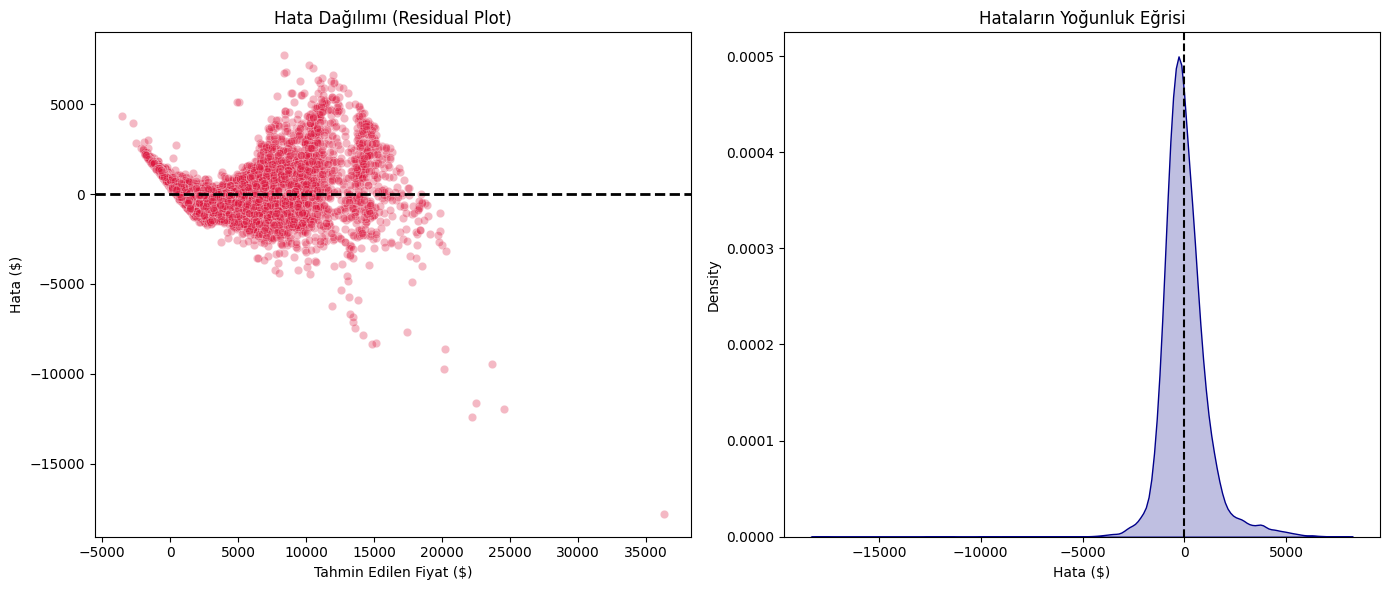

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hataları Hesapla
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))

# GRAFİK 1: Scatter Plot (Yelpaze Kontrolü)
plt.subplot(1, 2, 1)
# x: Tahmin Ettiğimiz Fiyat
# y: Ne Kadar Hata Yaptık
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3, color='crimson')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2) # İdeal Çizgi
plt.title('Hata Dağılımı (Residual Plot)')
plt.xlabel('Tahmin Edilen Fiyat ($)')
plt.ylabel('Hata ($)')

# GRAFİK 2: KDE Plot (Hata Şekli - Çan Eğrisi mi?)
plt.subplot(1, 2, 2)
sns.kdeplot(residuals, fill=True, color='darkblue')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Hataların Yoğunluk Eğrisi')
plt.xlabel('Hata ($)')

plt.tight_layout()
plt.show()

## POLİNOM REGRESYON

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Polinom Dönüştürücüsünü Hazırla
# degree=2: Karesini al ve ikili çarpımları (x*y) ekle demektir.
# include_bias=False: Sabit sayıyı (bias) ekleme, onu LinearRegression halleder.
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. X verisini dönüştür (Fit & Transform)
# Dikkat: Sadece X (özellikler) dönüştürülür, y (fiyat) aynı kalır.
X_poly = poly.fit_transform(X)

# 3. Boyut Kontrolü (Şok olmaya hazır ol)
print(f"Orijinal Veri Şekli (Satır, Sütun): {X.shape}")
print(f"Polinom Veri Şekli  (Satır, Sütun): {X_poly.shape}")

# 4. Yeni sütunlar neler? (İlk 15 tanesine bakalım)
feature_names = poly.get_feature_names_out(X.columns)
print("\nYeni Oluşan Özelliklerden Bazıları:")
print(feature_names[:15]) # İlk 15 tanesi
print("...")
print(feature_names[-5:]) # Son 5 tanesi

Orijinal Veri Şekli (Satır, Sütun): (53917, 9)
Polinom Veri Şekli  (Satır, Sütun): (53917, 54)

Yeni Oluşan Özelliklerden Bazıları:
['carat' 'depth' 'table' 'x' 'y' 'z' 'cut_score' 'color_score'
 'clarity_score' 'carat^2' 'carat depth' 'carat table' 'carat x' 'carat y'
 'carat z']
...
['cut_score color_score' 'cut_score clarity_score' 'color_score^2'
 'color_score clarity_score' 'clarity_score^2']


In [22]:
# 1. Eğitim ve Test Olarak Böl (Bu sefer X_poly kullanıyoruz!)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 2. Modeli Kur
poly_model = LinearRegression()

# 3. Eğit
poly_model.fit(X_train_poly, y_train)

# 4. Tahmin Et
y_pred_poly = poly_model.predict(X_test_poly)

# 5. Karne Hesapla
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"--- POLİNOM REGRESYON (Derece 2) KARNESİ ---")
print(f"R2 Skoru: {r2_poly:.4f} ")
print(f"MAE: {mae_poly:.0f} $ ")
print(f"RMSE: {rmse_poly:.0f} $")

--- POLİNOM REGRESYON (Derece 2) KARNESİ ---
R2 Skoru: 0.9668 
MAE: 441 $ 
RMSE: 724 $


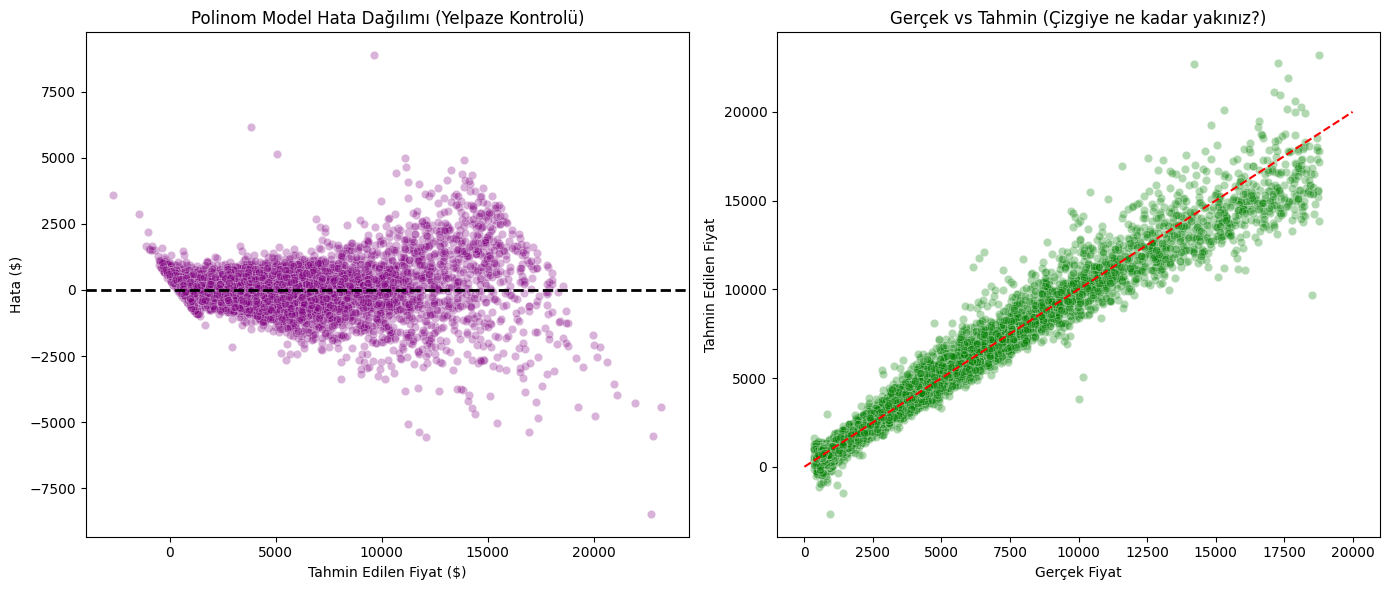

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hataları Hesapla
residuals_poly = y_test - y_pred_poly

plt.figure(figsize=(14, 6))

# Grafik 1: Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_poly, y=residuals_poly, alpha=0.3, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title('Polinom Model Hata Dağılımı (Yelpaze Kontrolü)')
plt.xlabel('Tahmin Edilen Fiyat ($)')
plt.ylabel('Hata ($)')

# Grafik 2: Gerçek vs Tahmin
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.3, color='green')
plt.plot([0, 20000], [0, 20000], 'r--') # Mükemmel tahmin çizgisi
plt.title('Gerçek vs Tahmin (Çizgiye ne kadar yakınız?)')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')

plt.tight_layout()
plt.show()

Derece 1 -> Train RMSE: 1218, Test RMSE: 1174
Derece 2 -> Train RMSE: 747, Test RMSE: 724
Derece 3 -> Train RMSE: 600, Test RMSE: 933
Derece 4 -> Train RMSE: 553, Test RMSE: 3054
Derece 5 -> Train RMSE: 525, Test RMSE: 7193


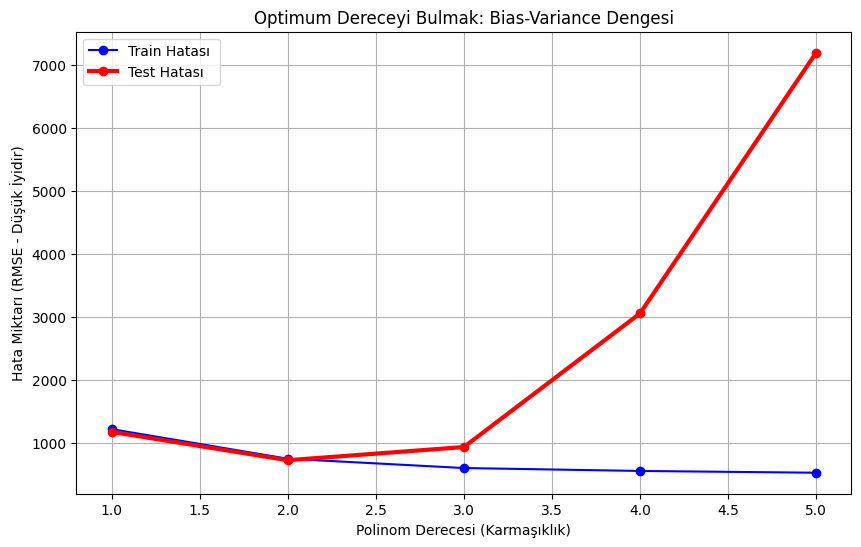

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Deneyeceğimiz dereceler (1'den 5'e kadar yeterli, sonrası çok yorar)
degrees = [1, 2, 3, 4, 5]

train_rmse_list = []
test_rmse_list = []

X_ham = df_encoded.drop('price', axis=1)
y_ham = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X_ham, y_ham, test_size=0.2, random_state=42)


for d in degrees:
    # 1. Polinom Özellikleri Yarat
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 2. Modeli Eğit
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # 3. Tahmin Yap
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)

    # 4. Hataları (RMSE) Hesapla ve Kaydet
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

    print(f"Derece {d} -> Train RMSE: {train_rmse:.0f}, Test RMSE: {test_rmse:.0f}")

# --- GRAFİK ÇİZİMİ ---
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse_list, marker='o', label='Train Hatası ', color='blue')
plt.plot(degrees, test_rmse_list, marker='o', label='Test Hatası ', color='red', linewidth=3)

plt.title('Optimum Dereceyi Bulmak: Bias-Variance Dengesi')
plt.xlabel('Polinom Derecesi ')
plt.ylabel('Hata Miktarı ')
plt.legend()
plt.grid(True)
plt.show()